In [58]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [9]:
# Load data file
data_path = os.getcwd() + '/df_all.csv'
all_data = pd.read_csv(data_path)

all_data.head()

,rgi_id,period,PDD,area,icecap,lat,prcp_01,prcp_02,prcp_03,prcp_04,...,temp_09,temp_10,temp_11,temp_12,zmax,zmed,zmin,dmdtda,err_dmdtda,target_id
0,RGI60-08.00001,2000-2010,39.787001,0.03,0.0,67.93,59.556398,42.393607,49.464068,40.707838,...,8.765555,13.037779,10.950000,6.391112,250.0,242.0,235.0,-0.458772,0.449120,0.0
1,RGI60-08.00001,2010-2020,41.833601,0.03,0.0,67.93,57.685775,45.119089,49.848962,37.706105,...,8.942221,13.034446,11.120000,7.227779,250.0,242.0,235.0,-0.356250,0.435293,1.0
2,RGI60-08.00002,2000-2010,44.907200,0.03,0.0,67.87,62.082497,43.677873,49.432192,41.313322,...,9.274814,13.517038,11.384073,6.784445,246.0,239.0,228.0,-0.458772,0.449120,2.0
3,RGI60-08.00002,2010-2020,46.980223,0.03,0.0,67.87,59.345685,45.845166,49.957571,37.644466,...,9.423703,13.538149,11.500740,7.632223,246.0,239.0,228.0,-0.356250,0.435293,3.0
4,RGI60-08.00003,2000-2010,35.337201,0.02,0.0,67.82,60.485810,45.600863,55.059464,46.842254,...,7.059999,11.433335,9.346666,4.700001,749.0,726.0,701.0,-0.458772,0.449120,4.0


## Mass balance

<Axes: >

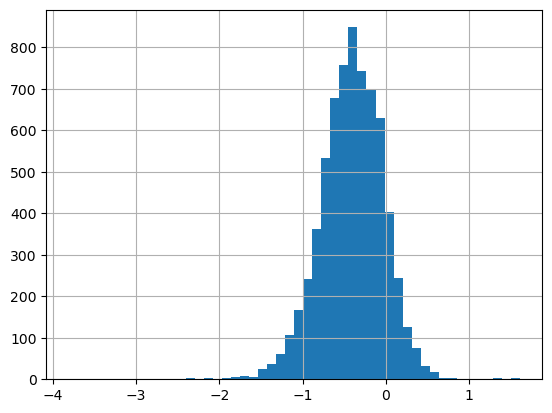

In [10]:
all_data['dmdtda'].hist(bins=50)  # overall negative mass balance for glaciers in study area

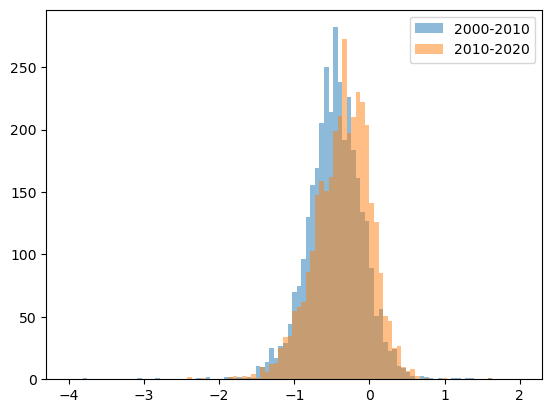

In [28]:
# is there a significant difference in mass balance by period?

period1 = all_data[all_data['period'] == '2000-2010']
period2 = all_data[all_data['period'] == '2010-2020']

bins = np.linspace(-4, 2, 100)

plt.hist(period1['dmdtda'], bins, alpha=0.5, label='2000-2010')
plt.hist(period2['dmdtda'], bins, alpha=0.5, label='2010-2020')
plt.legend(loc='upper right')
plt.show()

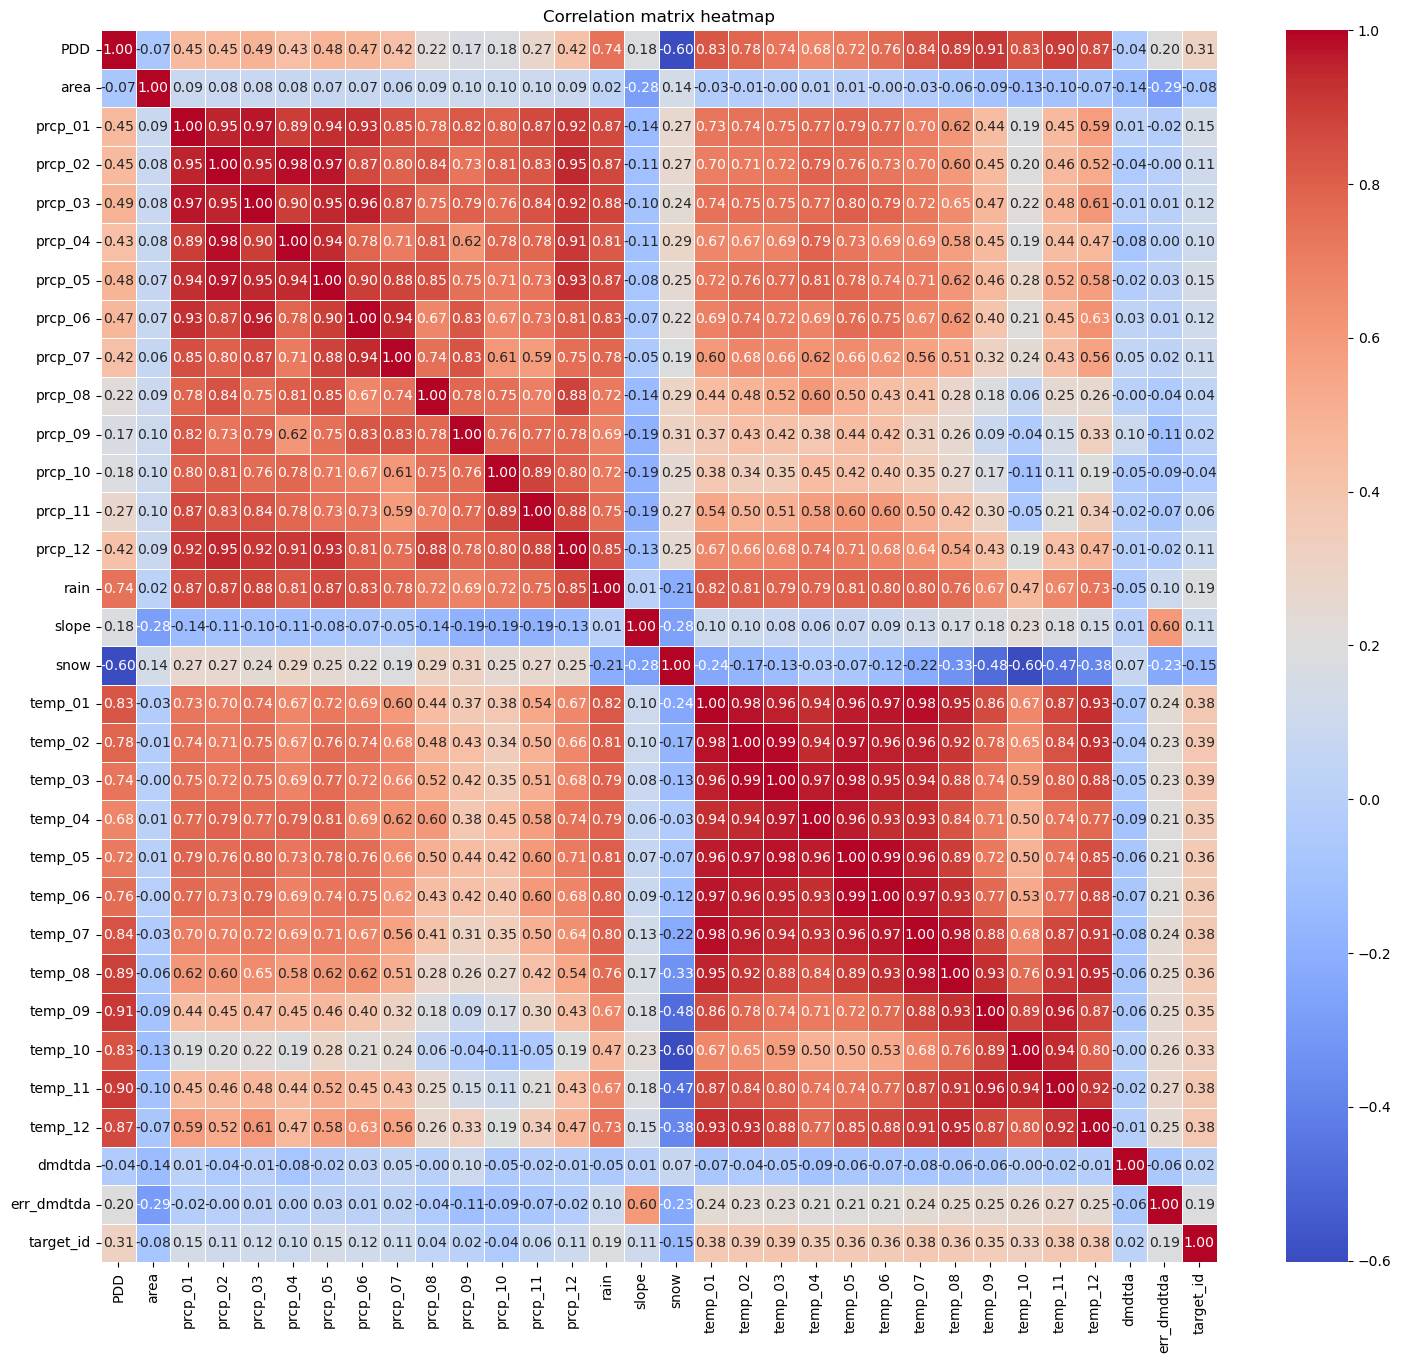

In [48]:
# Drop some columns (eg. non-numeric values, geometric values) to make a correlation heatmap
data_num = all_data.drop(['rgi_id', 'period', 'icecap', 'lat', 'zmax', 'zmin', 'zmed'], axis=1)

plt.figure(figsize=(18,16))
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation matrix heatmap")
plt.show()

## Separating dataset

In [59]:
# Grab indices of training & test sets using sklearn function on full dataset
glacier_ids = np.unique(all_data.index.get_level_values(0).values)

# Separate dataset
train, tes = train_test_split(glacier_ids, train_size=0.7, test_size=0.3)
training = all_data.loc[train]
test = all_data.loc[tes]

training.shape, test.shape

((4783, 39), (2051, 39))

In [60]:
# Grab indices of training & validation sets using sklearn function on training set
glacier_ids_train = np.unique(training.index.get_level_values(0).values)

train, val = train_test_split(glacier_ids_train, train_size=0.8, test_size=0.2)
training = training.loc[train]
validation = training.loc[val]

training.shape, validation.shape

KeyError: "None of [Index([2712,  610, 3988, 4720, 1659, 5265, 4889,   80, 6168,  161,\n       ...\n       6049,  515, 2341, 3026, 5099, 1909, 4228,  889, 6124,  663],\n      dtype='int64', length=957)] are in the [index]"